In [1]:
import sys, time, wmi, psutil
SYSTEM_INFO = wmi.WMI().Win32_OperatingSystem()[0]
"system: {0}, {1}, {2}".format(SYSTEM_INFO.Caption, SYSTEM_INFO.BuildNumber, SYSTEM_INFO.OSArchitecture) 
"memory: {}G".format(round(psutil.virtual_memory().total / 1024**3, 2))
"cpu: {}".format(psutil.cpu_count())
"python: {}".format(sys.version)
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

'system: Microsoft Windows 10 教育版, 18363, 64 位'

'memory: 15.86G'

'cpu: 4'

'python: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]'

'2020-06-21 22:20:31'

- **@author**: run_walker
- **@references**:
    1. [github > pyecharts](https://github.com/pyecharts/pyecharts)
    2. [pyecharts官方文档 > Scatter3d demo](http://gallery.pyecharts.org/#/Scatter3D/scatter3d)

In [2]:
import numpy as np
import pandas as pd
 
# x, y, z 均为 0 到 1 之间的 100 个随机数
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
z = np.random.normal(0, 1, 100)
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

# 不可交互

## `matplotlib`

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style='white')
# sns.set()


def scatter_3d_sns(df, x, y, z, figsize=None, title=None, azim=134, elev=48):
    if figsize is not None:
        fig = plt.figure(figsize=figsize)
    else:
        fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0.1, 1.5, 2], azim=azim, elev=elev)
    ax.scatter(df[x], df[y], df[z])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    if title is not None:
#         ax.set_title(title)
        plt.title(title)
    plt.show();

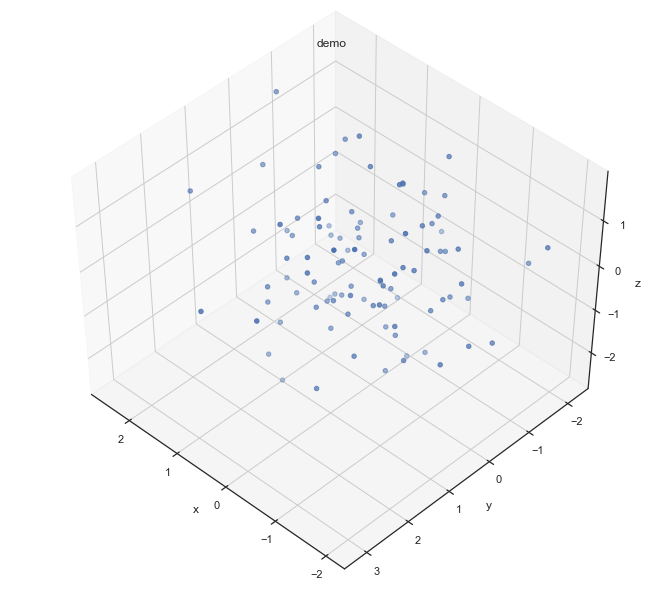

In [4]:
scatter_3d_sns(df, 'x', 'y', 'z', title='demo')  

<div class="alert alert-block alert-info">
    <i class="fa fa-list-alt" aria-hidden="true"><b> Todo:</b> 如何让title置于画布外</i>
</div>

# 可交互

## `pyecharts`

<div class="alert alert-block alert-info">
    <i class="fa fa-list-alt" aria-hidden="true"><b> Todo:</b></i>
    <li>设置标题</li>
    <li>如何通过代码判断是在notebook中还是lab中</li>
    <li>加入对散点大小及色彩的控制，以展示更多维的信息</li>
</div>

### `jupyter notebook`

In [5]:
import pyecharts.options as opts
from pyecharts.charts import Scatter3D


def scatter_3d_pyecharts(df, x, y, z):
    obj = Scatter3D(
        init_opts=opts.InitOpts()
    ).add(
        series_name="",
        data=df[[x, y, z]].values.tolist(),
        xaxis3d_opts=opts.Axis3DOpts(
            name=x,
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        yaxis3d_opts=opts.Axis3DOpts(
            name=y,
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        zaxis3d_opts=opts.Axis3DOpts(
            name=z,
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        grid3d_opts=opts.Grid3DOpts(width=100, height=100, depth=100)
    ).set_global_opts(
        visualmap_opts=[]
    ).render_notebook()
    return obj

### `jupyter lab`
需要安装`plotly-extension`扩展

In [6]:
import pyecharts.options as opts
from pyecharts.charts import Scatter3D
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB


def scatter_3d_pyecharts(df, x, y, z, title=None):
    obj = Scatter3D(
        init_opts=opts.InitOpts()
    ).add(
        series_name="",
        data=df[[x, y, z]].values.tolist(),
        xaxis3d_opts=opts.Axis3DOpts(
            name=x,
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        yaxis3d_opts=opts.Axis3DOpts(
            name=y,
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        zaxis3d_opts=opts.Axis3DOpts(
            name=z,
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        grid3d_opts=opts.Grid3DOpts(width=100, height=100, depth=100)
    ).set_global_opts(
        visualmap_opts=[]
    )
    obj.load_javascript()
    return obj.render_notebook()

In [7]:
scatter_3d_pyecharts(df, 'x', 'y', 'z')